# Data wrangling Project - Abdullah Al-Weheid

### The data around us in the world is in good quality and in strong structure, thus will affect the insights gatherd from the data. So before any steps of making a dcesion or prediction for example everyone need to sure that it's data in good qulaity and tidness to make observaions and excellent visualization.

### In this project I will do the most important steps in the wrangling phase which are:
#### - Gathering
#### - Assessing
#### - Cleaning

## Let's do first step(Gathering):

<div class="alert alert-warning">
<b>NOTE</b> I choosed to take the JSON file by downloading it from the project guide, because i didn't have nuch time to trying with the twitter developer account and i thought that will take much time. But for sure i will do it in future and go back again to this project to review as I do.
    
   I hope getting your acceptance of that.
   
   Thank you :)
</div>
<div class=warn>

<div/>

In [7]:
## Import the appropriate libraries: 
## there are some libraries will not be use like tweepy, i will not post it here:
import pandas as pd
import numpy as np
import requests 
import json

## If there any required libraries i will listed thier in their part.

***Downloading and loading data files:***

In [50]:
## Download and save Images data:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)


with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)
    
imagesdf = pd.read_csv('image-predictions.tsv' , sep='\t')
#** DONE 

## loading archive file :
archivedf = pd.read_csv('twitter-archive-enhanced.csv')
#** DONE 

## load download json file :
tweetdf = pd.read_json('tweet-json.txt' , lines=True)
#** DONE


In [51]:
imagesdf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
print(imagesdf.info())
imagesdf.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


2075

>**images df has 2075 rows and there are not missing values.**

In [21]:
archivedf.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
print(archivedf.info())
archivedf.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2356

> **Archive tweets have missing values in some columns and it has 2356 entries.**

In [20]:
tweetdf.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [17]:
print(tweetdf.info())
tweetdf.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

2354

>**tweetdf is loaded and we can see that in very quick look there are many columns and missing valuse.**

>**tweetdf has 2354 entries**

## -------------------------------------------------------------

## Assessing :

#### after gathering data and store them in data frame, now it is time to see the problems of quality and tidness of each one before clean them and write observasions.

**`let me start with tweetdf because I think that it's very dirty and messy and need hard work`**

In [26]:
tweetdf.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [30]:
tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

`Obvoiusly we can see the problems in tidness and quality of data `
### Tweet dataframe:
#### Quality issues :
> - Missing values in some cloumns 
> - many columns that are not needed such as 'qouted_status' 
> - Id type is int64 and of course we need the identifire to be str so I will change it to be object.
> - `display_text_range` has a range with fixed start value equals to 0 so need to fix it to be an integer.

#### Tidness :
> - Id column should named 'tweet_id' as the others data have.

In [47]:
archivedf.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [39]:
archivedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Archive dataframe:
#### Quality issues :
> - Missing values in some cloumns 
> - `rating_numerator` and `rating_denominator` should merge to be `rating_value` as one columns after fix them wrong values and the type of the rating should be float64 as it division.
> - Id type is int64 and of course we need the identifire to be str so I will change it to be object.
> - `timestamp` column should be converted to date if we need to deal with it.

#### Tidness :
> - the stages of dogs are seperated in many columns and it should be merged in one column.

In [45]:
imagesdf.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
1596,798933969379225600,https://pbs.twimg.com/media/CxZiLcLXUAApMVy.jpg,1,Siberian_husky,0.703224,True,Eskimo_dog,0.229351,True,malamute,0.044351,True
490,675531475945709568,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1,Pembroke,0.918441,True,Cardigan,0.027339,True,Siberian_husky,0.020221,True
827,693486665285931008,https://pbs.twimg.com/ext_tw_video_thumb/69348...,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False


In [42]:
imagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### images dataframe:
#### Quality issues :
> - Id type is int64 and of course we need the identifire to be str so I will change it to be object.
> - there are non dogs prediction like some fruits, this is not related to the data, it should be deleted.


#### Tidness :
> - some unneed columns, which should be dropped.

## --------------------------------------------------------------
## Cleaning :

#### this phase has biggest amount of code and many manipulations of data, to finnaly produce a very well structured data.

#### lets start with:

### Tweet datafram :

In [293]:
tweetdf.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [294]:
## create a copy of the tweet data
ctweetdf = tweetdf.copy()

In [295]:
## Then, let me rename the id_str to be tweet_id like the other datasets:
ctweetdf = ctweetdf.rename({'id_str' : 'tweet_id'} , axis=1)
ctweetdf.head(1)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [296]:
## change the type of tweet_id to be Object :
ctweetdf.tweet_id = ctweetdf.tweet_id.astype(str)
type(ctweetdf['tweet_id'][0])

str

In [297]:
## Now let us check the duplication in tweet_id :
ctweetdf.tweet_id.duplicated().sum()

0

`There are no dublicated tweet in tweet dataframe`

In [298]:
## Let us clean the columns by delete uneeded ones:
# list the columns we want to drop it 
droppedcolumns = ['created_at','contributors','coordinates','entities','extended_entities','in_reply_to_status_id','favorited','retweeted','geo','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_id_str','truncated','user']
ctweetdf.drop(droppedcolumns ,axis=1,inplace=True)

In [299]:
ctweetdf.head(1)

,id,tweet_id,full_text,display_text_range,source,retweet_count,favorite_count,retweeted_status
0,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",8853,39467,NaN


In [300]:
ctweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
id                    2354 non-null int64
tweet_id              2354 non-null object
full_text             2354 non-null object
display_text_range    2354 non-null object
source                2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
retweeted_status      179 non-null object
dtypes: int64(3), object(5)
memory usage: 147.2+ KB


>**there are 179 entries that are not original tweet, I will delete it.**

In [301]:
## delete retweets:
ctweetdf.retweeted_status.isnull().sum()

2175

In [302]:
## If we compare the same entry with it self we will get the vlaues either only non-null or Null depends on comparing for the column:
ctweetdf = ctweetdf.query("retweeted_status != retweeted_status")

In [303]:
ctweetdf.shape[0]

2175

In [304]:
ctweetdf.retweeted_status.notnull().sum()

0

In [305]:
## As we delete the non-null values , we dont need the column of retweeted_state, so i will drop it:
ctweetdf.drop(['retweeted_status'], axis=1 , inplace=True)

In [306]:
ctweetdf.head(1)

,id,tweet_id,full_text,display_text_range,source,retweet_count,favorite_count
0,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",8853,39467


In [307]:
## Now i will also drop all the column i don't  need
droppedcolumns2 = ['id','source','full_text','display_text_range']
ctweetdf.drop(droppedcolumns2,axis=1,inplace=True)
ctweetdf.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336192,8853,39467


### Archive datafram :

In [527]:
archivedf.head(1)
carchivedf = archivedf.copy()
carchivedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [528]:
## delete unneed columns :
droppedcolumns3 = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls']
carchivedf.drop(droppedcolumns3,axis=1,inplace=True)

In [529]:
carchivedf.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


In [530]:
## As the rating values is coorect as the guidness said, i will find the rating by dividing them and set on column for it:
carchivedf['rating_numerator']= carchivedf['rating_numerator'].astype(float)
carchivedf['rating_denominator']= carchivedf['rating_denominator'].astype(float)
carchivedf['rating'] = carchivedf['rating_numerator']/carchivedf['rating_denominator']

In [531]:
## Delete rating_numerator and rating_denominator:
carchivedf.drop(['rating_numerator' , 'rating_denominator'], axis=1 , inplace=True)


In [532]:
carchivedf['tweet_id'] = carchivedf['tweet_id'].astype(str)

In [533]:
carchivedf.drop(['source'], axis=1 , inplace=True)
carchivedf.head(1)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,1.3


In [534]:
carchivedf.shape[0]

2356

In [535]:
##Now I will add the Stage column and store the value of each stages to it then drop them from the datafram:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
columns_tobe = []
for i in carchivedf.columns.tolist():
    if i not in stages:
        columns_tobe.append(i)
print(columns_tobe)        


['tweet_id', 'timestamp', 'text', 'name', 'rating']


In [536]:
carchivedf = pd.melt(carchivedf, id_vars = columns_tobe, value_vars = stages,
       var_name = 'stage', value_name = 'stage_of_dog')

carchivedf.drop('stage',axis=1,inplace=True)
print(carchivedf.stage_of_dog.value_counts())

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: stage_of_dog, dtype: int64


In [537]:
carchivedf = carchivedf.sort_values('stage_of_dog').drop_duplicates('tweet_id', keep = 'last')

In [538]:
carchivedf

,tweet_id,timestamp,text,name,rating,stage_of_dog
2259,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,None,1.2,None
2260,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,None,0.5,None
2261,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,None,0.1,None
2262,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,George,0.9,None
2263,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, w...",Kial,1.0,None
...,...,...,...,...,...,...
7463,825535076884762624,2017-01-29 02:44:34 +0000,Here's a very loving and accepting puppo. Appe...,None,1.4,puppo
7465,825120256414846976,2017-01-27 23:16:13 +0000,RT @dog_rates: Say hello to Pablo. He's one go...,Pablo,1.2,puppo
7466,825026590719483904,2017-01-27 17:04:02 +0000,Say hello to Pablo. He's one gorgeous puppo. A...,Pablo,1.2,puppo
7622,803773340896923648,2016-11-30 01:31:12 +0000,This is Diogi. He fell in the pool as soon as ...,Diogi,1.2,puppo


In [539]:
carchivedf.tweet_id.duplicated().sum()

0

In [570]:
print(carchivedf.stage_of_dog.value_counts())

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: stage_of_dog, dtype: int64


### images datafram :

In [541]:
imagesdf.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [542]:
imagesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [543]:
## Make a copy :
cimagesdf = imagesdf.copy()

In [544]:
cc = cimagesdf.copy()
prediction = []
pre_conf = []
for index, row in cc.iterrows():
    if (row['p1_dog'] == True):
        prediction.append(row['p1'])
        pre_conf.append(row['p1_conf'])
    elif (row['p2_dog'] == True):
        prediction.append(row['p2'])
        pre_conf.append(row['p2_conf'])
    elif (row['p3_dog'] == True):
        prediction.append(row['p3'])
        pre_conf.append(row['p3_conf'])
    else:
        prediction.append('NaN')
        pre_conf.append(0)    

In [545]:
## Add prediction and pre_conf to the dataframe:
cimagesdf['prediction'] = prediction
cimagesdf['pre_conf'] = pre_conf

In [546]:
cimagesdf.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,pre_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [547]:
## drop uneeded column :
cimagesdf.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [548]:
cimagesdf['tweet_id'] = cimagesdf['tweet_id'].astype(str)

In [549]:
cimagesdf

,tweet_id,jpg_url,prediction,pre_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


In [550]:
## delete non-dogs:
cimagesdf = cimagesdf.query("prediction != 'NaN'")

## Creating Master dataframe :

In [551]:
masterdf = pd.merge(carchivedf, ctweetdf, on='tweet_id', how='left')
masterdf.head(3)

,tweet_id,timestamp,text,name,rating,stage_of_dog,retweet_count,favorite_count
0,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,None,1.2,None,NaN,NaN
1,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,None,0.5,None,NaN,NaN
2,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,None,0.1,None,2454.0,6138.0


In [552]:
masterdf = pd.merge(masterdf, cimagesdf, on='tweet_id', how='left')
masterdf.head(3)

,tweet_id,timestamp,text,name,rating,stage_of_dog,retweet_count,favorite_count,jpg_url,prediction,pre_conf
0,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,None,1.2,None,NaN,NaN,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081
1,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,None,0.5,None,NaN,NaN,NaN,NaN,NaN
2,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,None,0.1,None,2454.0,6138.0,NaN,NaN,NaN


In [554]:
masterdf.stage_of_dog.unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [555]:
cmasterdf = masterdf.copy()

In [556]:
## check duplications:
cmasterdf.info()
cmasterdf.tweet_id.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id          2356 non-null object
timestamp         2356 non-null object
text              2356 non-null object
name              2356 non-null object
rating            2356 non-null float64
stage_of_dog      2356 non-null object
retweet_count     1420 non-null float64
favorite_count    1420 non-null float64
jpg_url           1751 non-null object
prediction        1751 non-null object
pre_conf          1751 non-null float64
dtypes: float64(4), object(7)
memory usage: 220.9+ KB


0

In [572]:
cmasterdf.head(3)

,tweet_id,timestamp,text,name,rating,stage_of_dog,retweet_count,favorite_count,jpg_url,prediction,pre_conf
0,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,None,1.2,None,NaN,NaN,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081
1,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,None,0.5,None,NaN,NaN,NaN,NaN,NaN
2,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,None,0.1,None,2454.0,6138.0,NaN,NaN,NaN


In [571]:
cmasterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id          2356 non-null object
timestamp         2356 non-null object
text              2356 non-null object
name              2356 non-null object
rating            2356 non-null float64
stage_of_dog      2356 non-null object
retweet_count     1420 non-null float64
favorite_count    1420 non-null float64
jpg_url           1751 non-null object
prediction        1751 non-null object
pre_conf          1751 non-null float64
dtypes: float64(4), object(7)
memory usage: 220.9+ KB


> - there are just 1420 entries which have retweets and favorites values: 
> - may I keep the data as it is , or i will delete the 
> - the same optional issue happend to prediction also
> - it is depend on my need to find an insight, so i will keep it as it is.

In [573]:
## Save the master data into 'master_df.csv':
cmasterdf.to_csv('master_df.csv')

### Insight and observasions:

In [574]:
cmasterdf.head(5)

,tweet_id,timestamp,text,name,rating,stage_of_dog,retweet_count,favorite_count,jpg_url,prediction,pre_conf
0,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,None,1.2,None,NaN,NaN,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081
1,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,None,0.5,None,NaN,NaN,NaN,NaN,NaN
2,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,None,0.1,None,2454.0,6138.0,NaN,NaN,NaN
3,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,George,0.9,None,NaN,NaN,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424
4,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, w...",Kial,1.0,None,568.0,917.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893


In [584]:
cmasterdf.describe()

,rating,retweet_count,favorite_count,pre_conf
count,2356.0,1420.000000,1420.000000,1751.000000
mean,inf,2603.376761,8287.144366,0.548992
std,NaN,4049.137824,11141.534237,0.298804
min,0.0,2.000000,52.000000,0.000010
25%,1.0,578.500000,1786.750000,0.303098
50%,1.1,1311.000000,3903.000000,0.548907
75%,1.2,3103.750000,10280.000000,0.820481
max,inf,56625.000000,107015.000000,0.999956


> - we can see that the largest number of retweets of one tweet is 56625 
> - and for favorite it is equal to 107015
> - and the big accurate number of orediction is very good, it is nearly to be 100% , also we can see the prediction is good if we look at the quartiles.

In [585]:
cmasterdf.describe(include='O')

,tweet_id,timestamp,text,name,stage_of_dog,jpg_url,prediction
count,2356,2356,2356,2356,2356,1751,1751
unique,2356,2356,2356,957,5,1691,113
top,687826841265172480,2015-11-18 19:43:11 +0000,This is Lizzie. She's about to fist bump the l...,None,None,https://pbs.twimg.com/ext_tw_video_thumb/81596...,golden_retriever
freq,1,1,1,745,1976,2,173


> - we can clearly see the none names frequent 754 times and this is big number.Unfortunately many entries have none in names.
> - The same problem happend with stage_of_dog.
> - we can see that two same picture tweeted in different times. May we caount this as duplicate.

In [603]:
## let us see which name has highest frequent after None :
cmasterdf['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Aqua         1
Odin         1
Huck         1
Brooks       1
Champ        1
Name: name, Length: 957, dtype: int64

> - `a` is the most frequent name

In [620]:
cmasterdf.groupby(['prediction','stage_of_dog','name']).mean().sort_values(by='retweet_count',ascending=False)

rating  retweet_count  \
prediction         stage_of_dog name                              
Chihuahua          None         Stephan     1.30        56625.0   
standard_poodle    doggo        Bo          1.40        42228.0   
whippet            None         Kenneth     1.00        31989.0   
Bedlington_terrier None         None        1.05        30742.0   
golden_retriever   None         Zoey        1.30        27680.0   
...                                          ...            ...   
vizsla             None         Beau        1.30            NaN   
                                Bodie       0.90            NaN   
                                Kreg        1.10            NaN   
                                Philbert    1.10            NaN   
whippet            doggo        Miguel      1.20            NaN   

                                          favorite_count  pre_conf  
prediction         stage_of_dog name                                
Chihuahua          None         Stephan         107015.0  0.505370  
standard_poodle    doggo        Bo               95450.0  0.351308  
whippet            None         Kenneth          67100.0  0.000132  
Bedlington_terrier None         None             61794.0  0.152259  
golden_retriever   None         Zoey             85011.0  0.841001  
...                                                  ...       ...  
vizsla             None         Beau                 NaN  0.960513  
                                Bodie                NaN  0.876413  
                                Kreg                 NaN  0.657275  
                                Philbert             NaN  0.307794  
whippet            doggo        Miguel               NaN  0.601712  

[1364 rows x 4 columns]

In [617]:
cmasterdf.groupby(['prediction','stage_of_dog','name']).mean().sort_values(by='favorite_count',ascending=False)

rating  retweet_count  \
prediction         stage_of_dog name                              
Chihuahua          None         Stephan      1.3        56625.0   
standard_poodle    doggo        Bo           1.4        42228.0   
golden_retriever   None         Zoey         1.3        27680.0   
malamute           None         quite        1.2        25661.0   
Labrador_retriever None         Lilly        1.3        19297.0   
...                                          ...            ...   
vizsla             None         Beau         1.3            NaN   
                                Bodie        0.9            NaN   
                                Kreg         1.1            NaN   
                                Philbert     1.1            NaN   
whippet            doggo        Miguel       1.2            NaN   

                                          favorite_count  pre_conf  
prediction         stage_of_dog name                                
Chihuahua          None         Stephan         107015.0  0.505370  
standard_poodle    doggo        Bo               95450.0  0.351308  
golden_retriever   None         Zoey             85011.0  0.841001  
malamute           None         quite            75193.0  0.216163  
Labrador_retriever None         Lilly            73397.0  0.908703  
...                                                  ...       ...  
vizsla             None         Beau                 NaN  0.960513  
                                Bodie                NaN  0.876413  
                                Kreg                 NaN  0.657275  
                                Philbert             NaN  0.307794  
whippet            doggo        Miguel               NaN  0.601712  

[1364 rows x 4 columns]

> - Most favoraited and retweeted dog is called Stephan and the predection of it's stage is Chihuahua

In [623]:
## Now we will see the most prediction values that are repeated:
cmasterdf.prediction.value_counts()

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
                     ... 
clumber                 1
silky_terrier           1
Scotch_terrier          1
standard_schnauzer      1
EntleBucher             1
Name: prediction, Length: 113, dtype: int64

In [624]:
import matplotlib.pyplot as plt 

In [641]:
prediction_names = cmasterdf['prediction'].value_counts().keys().tolist()
counts = cmasterdf['prediction'].value_counts().tolist()

Text(0.5, 1.0, 'Top 5 of predictions')

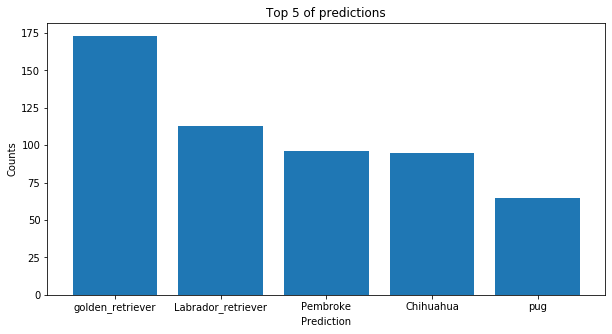

In [663]:
plt.figure(figsize=(10,5))
plt.bar(prediction_names[0:5],counts[0:5])
plt.ylabel('Counts'),plt.xlabel('Prediction')
plt.title('Top 5 of predictions')

> - We can see that the top 5 predection was to these types